# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# performing weather check on every single city and printing the log
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid="+weather_api_key
    response = requests.get(url)
    data = response.json()
    try: 
        print(f'City ID: {data["id"]}, Name: {data["name"]}')
        print('============================================')
    except:
        pass
    else:
        print(f'Latitude: {data["coord"]["lat"]}, Temparature(F): {data["main"]["temp"]}, Humidity(%): {data["main"]["humidity"]}, Cloudiness(%): {data["clouds"]["all"]}, Wind Speed(mph): {data["wind"]["speed"]}')
        print('--------------------------------------------')

City ID: 3160100, Name: Brekstad
Latitude: 63.69, Temparature(F): 286.54, Humidity(%): 93, Cloudiness(%): 10, Wind Speed(mph): 2.1
--------------------------------------------
City ID: 1642773, Name: Japura
Latitude: -0.32, Temparature(F): 295.51, Humidity(%): 93, Cloudiness(%): 82, Wind Speed(mph): 0.72
--------------------------------------------
City ID: 2123814, Name: Leningradskiy
Latitude: 69.38, Temparature(F): 288.27, Humidity(%): 50, Cloudiness(%): 18, Wind Speed(mph): 1.44
--------------------------------------------
City ID: 3833367, Name: Ushuaia
Latitude: -54.8, Temparature(F): 273.15, Humidity(%): 91, Cloudiness(%): 20, Wind Speed(mph): 2.6
--------------------------------------------
City ID: 3547867, Name: Manzanillo
Latitude: 20.34, Temparature(F): 299.68, Humidity(%): 81, Cloudiness(%): 100, Wind Speed(mph): 1.67
--------------------------------------------
City ID: 6201424, Name: Mataura
Latitude: -46.19, Temparature(F): 279.66, Humidity(%): 61, Cloudiness(%): 0, Win

City ID: 1150965, Name: Ranong
Latitude: 9.97, Temparature(F): 298.15, Humidity(%): 100, Cloudiness(%): 40, Wind Speed(mph): 4.2
--------------------------------------------
City ID: 556268, Name: Ostrovnoy
Latitude: 68.05, Temparature(F): 286.84, Humidity(%): 62, Cloudiness(%): 48, Wind Speed(mph): 7.89
--------------------------------------------
City ID: 1067565, Name: Beloha
Latitude: -25.17, Temparature(F): 287.17, Humidity(%): 80, Cloudiness(%): 0, Wind Speed(mph): 2.56
--------------------------------------------
City ID: 2400578, Name: Fougamou
Latitude: -1.22, Temparature(F): 295.49, Humidity(%): 93, Cloudiness(%): 77, Wind Speed(mph): 0.92
--------------------------------------------
City ID: 2138555, Name: Poum
Latitude: -20.23, Temparature(F): 297.14, Humidity(%): 76, Cloudiness(%): 44, Wind Speed(mph): 7.09
--------------------------------------------
City ID: 5321473, Name: Winslow
Latitude: 35.02, Temparature(F): 305.15, Humidity(%): 8, Cloudiness(%): 1, Wind Speed(mph):

City ID: 921786, Name: Mitsamiouli
Latitude: -11.38, Temparature(F): 298.74, Humidity(%): 67, Cloudiness(%): 23, Wind Speed(mph): 5.39
--------------------------------------------
City ID: 2112802, Name: Hasaki
Latitude: 35.73, Temparature(F): 295.48, Humidity(%): 100, Cloudiness(%): 75, Wind Speed(mph): 2.1
--------------------------------------------
City ID: 2109528, Name: Buala
Latitude: -8.14, Temparature(F): 302.9, Humidity(%): 72, Cloudiness(%): 4, Wind Speed(mph): 4.54
--------------------------------------------
City ID: 1058381, Name: Morondava
Latitude: -20.28, Temparature(F): 294.39, Humidity(%): 59, Cloudiness(%): 0, Wind Speed(mph): 5.01
--------------------------------------------
City ID: 3723593, Name: Jérémie
Latitude: 18.65, Temparature(F): 300.53, Humidity(%): 71, Cloudiness(%): 100, Wind Speed(mph): 0.33
--------------------------------------------
City ID: 3115824, Name: Muros
Latitude: 42.78, Temparature(F): 288.15, Humidity(%): 85, Cloudiness(%): 82, Wind Speed(

City ID: 3831208, Name: Qaanaaq
Latitude: 77.48, Temparature(F): 277.77, Humidity(%): 69, Cloudiness(%): 9, Wind Speed(mph): 1.93
--------------------------------------------
City ID: 3020980, Name: Douchy-les-Mines
Latitude: 50.3, Temparature(F): 287.52, Humidity(%): 67, Cloudiness(%): 10, Wind Speed(mph): 1.5
--------------------------------------------
City ID: 964432, Name: Port Alfred
Latitude: -33.59, Temparature(F): 284.82, Humidity(%): 87, Cloudiness(%): 41, Wind Speed(mph): 2.24
--------------------------------------------
City ID: 3424607, Name: Tasiilaq
Latitude: 65.61, Temparature(F): 277.15, Humidity(%): 86, Cloudiness(%): 100, Wind Speed(mph): 3.6
--------------------------------------------
City ID: 2038342, Name: Beipiao
Latitude: 41.79, Temparature(F): 297.21, Humidity(%): 28, Cloudiness(%): 0, Wind Speed(mph): 7.59
--------------------------------------------
City ID: 3374166, Name: Tarrafal
Latitude: 15.28, Temparature(F): 299.15, Humidity(%): 83, Cloudiness(%): 40, 

City ID: 2119283, Name: Zyryanka
Latitude: 65.75, Temparature(F): 297.39, Humidity(%): 31, Cloudiness(%): 0, Wind Speed(mph): 2.61
--------------------------------------------
City ID: 1626703, Name: Soe
Latitude: -9.86, Temparature(F): 294.86, Humidity(%): 75, Cloudiness(%): 3, Wind Speed(mph): 2.35
--------------------------------------------
City ID: 2256895, Name: Mossendjo
Latitude: -2.95, Temparature(F): 291.99, Humidity(%): 98, Cloudiness(%): 25, Wind Speed(mph): 0.5
--------------------------------------------
City ID: 3466704, Name: Castro
Latitude: -24.79, Temparature(F): 288.82, Humidity(%): 95, Cloudiness(%): 100, Wind Speed(mph): 2.16
--------------------------------------------
City ID: 554668, Name: Kabardinka
Latitude: 44.65, Temparature(F): 289.44, Humidity(%): 100, Cloudiness(%): 20, Wind Speed(mph): 3
--------------------------------------------
City ID: 893549, Name: Chipinge
Latitude: -20.19, Temparature(F): 284.42, Humidity(%): 81, Cloudiness(%): 95, Wind Speed(mp

City ID: 1495022, Name: Petukhovo
Latitude: 55.07, Temparature(F): 279.45, Humidity(%): 74, Cloudiness(%): 53, Wind Speed(mph): 4.11
--------------------------------------------
City ID: 3663142, Name: Novo Aripuanã
Latitude: -5.12, Temparature(F): 297.18, Humidity(%): 95, Cloudiness(%): 35, Wind Speed(mph): 0.97
--------------------------------------------
City ID: 986717, Name: Kruisfontein
Latitude: -34, Temparature(F): 284.21, Humidity(%): 63, Cloudiness(%): 98, Wind Speed(mph): 1.86
--------------------------------------------
City ID: 1502073, Name: Krasnosel'kup
Latitude: 65.7, Temparature(F): 283.15, Humidity(%): 89, Cloudiness(%): 100, Wind Speed(mph): 9.33
--------------------------------------------
City ID: 6050066, Name: La Ronge
Latitude: 55.1, Temparature(F): 297.15, Humidity(%): 44, Cloudiness(%): 75, Wind Speed(mph): 5.7
--------------------------------------------
City ID: 779622, Name: Havøysund
Latitude: 71, Temparature(F): 286.15, Humidity(%): 58, Cloudiness(%): 50

City ID: 1273724, Name: Dadri
Latitude: 28.57, Temparature(F): 304.68, Humidity(%): 70, Cloudiness(%): 40, Wind Speed(mph): 2.1
--------------------------------------------
City ID: 738167, Name: Vezirköprü
Latitude: 41.14, Temparature(F): 287.15, Humidity(%): 87, Cloudiness(%): 75, Wind Speed(mph): 1
--------------------------------------------
City ID: 143921, Name: Aligoodarz
Latitude: 33.4, Temparature(F): 287.08, Humidity(%): 34, Cloudiness(%): 0, Wind Speed(mph): 1.3
--------------------------------------------
City ID: 4021858, Name: Guerrero Negro
Latitude: 27.98, Temparature(F): 294.53, Humidity(%): 63, Cloudiness(%): 0, Wind Speed(mph): 10.23
--------------------------------------------
City ID: 3002510, Name: Le Pradet
Latitude: 43.11, Temparature(F): 291.08, Humidity(%): 63, Cloudiness(%): 9, Wind Speed(mph): 5.7
--------------------------------------------
City ID: 5379524, Name: Orange
Latitude: 33.7, Temparature(F): 297.2, Humidity(%): 38, Cloudiness(%): 1, Wind Speed(mp

City ID: 6137462, Name: Saint-Augustin
Latitude: 51.23, Temparature(F): 284.8, Humidity(%): 62, Cloudiness(%): 52, Wind Speed(mph): 6.73
--------------------------------------------
City ID: 1259385, Name: Port Blair
Latitude: 11.67, Temparature(F): 301.5, Humidity(%): 82, Cloudiness(%): 98, Wind Speed(mph): 5.49
--------------------------------------------
City ID: 4893591, Name: Geneva
Latitude: 41.89, Temparature(F): 289.85, Humidity(%): 51, Cloudiness(%): 1, Wind Speed(mph): 6.7
--------------------------------------------
City ID: 1734971, Name: Pekan
Latitude: 3.48, Temparature(F): 298.15, Humidity(%): 94, Cloudiness(%): 20, Wind Speed(mph): 1
--------------------------------------------
City ID: 2156643, Name: Mount Gambier
Latitude: -37.83, Temparature(F): 283.15, Humidity(%): 93, Cloudiness(%): 75, Wind Speed(mph): 6.2
--------------------------------------------
City ID: 4513583, Name: Hamilton
Latitude: 39.18, Temparature(F): 294.36, Humidity(%): 56, Cloudiness(%): 75, Wind 

City ID: 1649150, Name: Bengkulu
Latitude: -3.8, Temparature(F): 296.91, Humidity(%): 84, Cloudiness(%): 46, Wind Speed(mph): 1.67
--------------------------------------------
City ID: 314967, Name: Fethiye
Latitude: 36.62, Temparature(F): 291.15, Humidity(%): 72, Cloudiness(%): 8, Wind Speed(mph): 1
--------------------------------------------
City ID: 3691954, Name: Sechura
Latitude: -5.56, Temparature(F): 293.06, Humidity(%): 72, Cloudiness(%): 3, Wind Speed(mph): 6.9
--------------------------------------------
City ID: 3832791, Name: Villa Carlos Paz
Latitude: -31.42, Temparature(F): 279.21, Humidity(%): 51, Cloudiness(%): 0, Wind Speed(mph): 3.6
--------------------------------------------
City ID: 6086673, Name: Neepawa
Latitude: 50.23, Temparature(F): 296.15, Humidity(%): 38, Cloudiness(%): 90, Wind Speed(mph): 10.3
--------------------------------------------
City ID: 1708743, Name: Kinablangan
Latitude: 7.69, Temparature(F): 302.34, Humidity(%): 68, Cloudiness(%): 98, Wind Sp

City ID: 2377457, Name: Nouadhibou
Latitude: 20.93, Temparature(F): 303.15, Humidity(%): 37, Cloudiness(%): 18, Wind Speed(mph): 10.8
--------------------------------------------
City ID: 1529484, Name: Kumul
Latitude: 42.8, Temparature(F): 299.56, Humidity(%): 16, Cloudiness(%): 100, Wind Speed(mph): 0.9
--------------------------------------------
City ID: 2088122, Name: Port Moresby
Latitude: -9.44, Temparature(F): 302.15, Humidity(%): 83, Cloudiness(%): 75, Wind Speed(mph): 5.1
--------------------------------------------
City ID: 3372472, Name: Vila Franca do Campo
Latitude: 37.72, Temparature(F): 287.15, Humidity(%): 76, Cloudiness(%): 20, Wind Speed(mph): 3.1
--------------------------------------------
City ID: 218229, Name: Bongandanga
Latitude: 1.5, Temparature(F): 295.44, Humidity(%): 86, Cloudiness(%): 70, Wind Speed(mph): 0.94
--------------------------------------------
City ID: 1735106, Name: George Town
Latitude: 5.41, Temparature(F): 299.41, Humidity(%): 94, Cloudiness

City ID: 585400, Name: Naftalan
Latitude: 40.51, Temparature(F): 294.15, Humidity(%): 56, Cloudiness(%): 40, Wind Speed(mph): 2.1
--------------------------------------------
City ID: 1733432, Name: Kota Kinabalu
Latitude: 5.97, Temparature(F): 300.14, Humidity(%): 78, Cloudiness(%): 20, Wind Speed(mph): 1.5
--------------------------------------------
City ID: 4033557, Name: Tautira
Latitude: -17.73, Temparature(F): 303.15, Humidity(%): 70, Cloudiness(%): 20, Wind Speed(mph): 4.1
--------------------------------------------
City ID: 2636276, Name: Tamworth
Latitude: 52.63, Temparature(F): 286.91, Humidity(%): 93, Cloudiness(%): 44, Wind Speed(mph): 1
--------------------------------------------
City ID: 1714733, Name: Dingle
Latitude: 11, Temparature(F): 298.85, Humidity(%): 83, Cloudiness(%): 100, Wind Speed(mph): 3.45
--------------------------------------------
City ID: 4148757, Name: Brandon
Latitude: 27.94, Temparature(F): 297.32, Humidity(%): 94, Cloudiness(%): 75, Wind Speed(mp

City ID: 4938048, Name: Grafton
Latitude: 42.21, Temparature(F): 289.54, Humidity(%): 44, Cloudiness(%): 75, Wind Speed(mph): 5.1
--------------------------------------------
City ID: 1295765, Name: Sittwe
Latitude: 20.15, Temparature(F): 301.57, Humidity(%): 83, Cloudiness(%): 100, Wind Speed(mph): 1.95
--------------------------------------------
City ID: 3380290, Name: Sinnamary
Latitude: 5.38, Temparature(F): 298.36, Humidity(%): 85, Cloudiness(%): 88, Wind Speed(mph): 2.19
--------------------------------------------
City ID: 455890, Name: Saldus
Latitude: 56.66, Temparature(F): 283.95, Humidity(%): 75, Cloudiness(%): 1, Wind Speed(mph): 3.13
--------------------------------------------
City ID: 152451, Name: Musoma
Latitude: -1.5, Temparature(F): 293.03, Humidity(%): 84, Cloudiness(%): 83, Wind Speed(mph): 2.98
--------------------------------------------
City ID: 1855342, Name: Nishihara
Latitude: 26.18, Temparature(F): 302.88, Humidity(%): 79, Cloudiness(%): 75, Wind Speed(mph)

City ID: 1488774, Name: Tyukhtet
Latitude: 56.54, Temparature(F): 290.43, Humidity(%): 90, Cloudiness(%): 99, Wind Speed(mph): 3.47
--------------------------------------------
City ID: 5019116, Name: Brainerd
Latitude: 46.36, Temparature(F): 293.88, Humidity(%): 43, Cloudiness(%): 1, Wind Speed(mph): 4.1
--------------------------------------------
City ID: 1855540, Name: Naze
Latitude: 28.37, Temparature(F): 301.66, Humidity(%): 89, Cloudiness(%): 75, Wind Speed(mph): 7.2
--------------------------------------------
City ID: 2136825, Name: Isangel
Latitude: -19.55, Temparature(F): 299.15, Humidity(%): 78, Cloudiness(%): 90, Wind Speed(mph): 4.1
--------------------------------------------
City ID: 117392, Name: Saqqez
Latitude: 36.25, Temparature(F): 283.74, Humidity(%): 45, Cloudiness(%): 0, Wind Speed(mph): 1.58
--------------------------------------------
City ID: 3692020, Name: Nauta
Latitude: -4.51, Temparature(F): 297.94, Humidity(%): 86, Cloudiness(%): 79, Wind Speed(mph): 0.9

City ID: 3445912, Name: Turmalina
Latitude: -17.29, Temparature(F): 289.42, Humidity(%): 74, Cloudiness(%): 0, Wind Speed(mph): 0.88
--------------------------------------------
City ID: 2021613, Name: Krasnorechenskiy
Latitude: 44.63, Temparature(F): 291.04, Humidity(%): 64, Cloudiness(%): 99, Wind Speed(mph): 1.7
--------------------------------------------
City ID: 1529195, Name: Shihezi
Latitude: 44.3, Temparature(F): 294.14, Humidity(%): 42, Cloudiness(%): 51, Wind Speed(mph): 3.44
--------------------------------------------
City ID: 180389, Name: Shimoni
Latitude: -4.65, Temparature(F): 298.09, Humidity(%): 79, Cloudiness(%): 75, Wind Speed(mph): 7.58
--------------------------------------------
City ID: 2278682, Name: Bensonville
Latitude: 6.45, Temparature(F): 296.15, Humidity(%): 94, Cloudiness(%): 75, Wind Speed(mph): 2.6
--------------------------------------------
City ID: 3440777, Name: Rocha
Latitude: -34.48, Temparature(F): 279.87, Humidity(%): 61, Cloudiness(%): 56, Wi

City ID: 1258726, Name: Rāmāpuram
Latitude: 13.12, Temparature(F): 302.15, Humidity(%): 66, Cloudiness(%): 20, Wind Speed(mph): 6.67
--------------------------------------------
City ID: 217834, Name: Bukama
Latitude: -9.2, Temparature(F): 291.58, Humidity(%): 45, Cloudiness(%): 0, Wind Speed(mph): 1.39
--------------------------------------------
City ID: 1512019, Name: Aksarka
Latitude: 66.56, Temparature(F): 280.18, Humidity(%): 65, Cloudiness(%): 63, Wind Speed(mph): 5.36
--------------------------------------------
City ID: 3451138, Name: Rio Grande
Latitude: -32.03, Temparature(F): 280.93, Humidity(%): 70, Cloudiness(%): 0, Wind Speed(mph): 0.45
--------------------------------------------
City ID: 2598243, Name: Soubre
Latitude: 5.79, Temparature(F): 296.02, Humidity(%): 98, Cloudiness(%): 100, Wind Speed(mph): 1.1
--------------------------------------------
City ID: 2191562, Name: Dunedin
Latitude: -45.87, Temparature(F): 283.2, Humidity(%): 49, Cloudiness(%): 0, Wind Speed(mp

City ID: 2092164, Name: Lorengau
Latitude: -2.02, Temparature(F): 302.98, Humidity(%): 67, Cloudiness(%): 59, Wind Speed(mph): 3.99
--------------------------------------------
City ID: 6156245, Name: Stephenville Crossing
Latitude: 48.5, Temparature(F): 281.89, Humidity(%): 93, Cloudiness(%): 75, Wind Speed(mph): 2.6
--------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# performing weather check on every single city and appending in csv
with open(output_data_file,'w', encoding='utf-8', newline='') as csv_file:
    writer=csv.writer(csv_file)
    writer.writerow(["City_ID", "City_Name", "Latitude", "Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"])

    print("Exporting to CSV. Please wait ...")
    for city in cities:
        url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid="+weather_api_key
        response = requests.get(url)
        data = response.json()
        try: 
            city_id = data["name"]
        except:
            pass
        else:
            writer.writerow([data["id"], data["name"], data["coord"]["lat"], data["main"]["temp"], data["main"]["humidity"], data["clouds"]["all"], data["wind"]["speed"]])

Exporting to CSV. Please wait ...


In [18]:
# after exporting create the dataframe
print("Export Complete! Creating Data Frame. Please wait ...")
city_weather_data = pd.read_csv(output_data_file)
city_weather_data.head(10)

Export Complete! Creating Data Frame. Please wait ...


,City_ID,City_Name,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,3160100,Brekstad,63.69,286.54,93,10,2.10
1,1642773,Japura,-0.32,295.51,93,82,0.72
2,2123814,Leningradskiy,69.38,288.27,50,18,1.44
3,3833367,Ushuaia,-54.80,273.15,91,20,2.60
4,3547867,Manzanillo,20.34,299.68,81,100,1.67
5,6201424,Mataura,-46.19,279.66,61,0,1.41
6,3361934,Saldanha,-33.01,285.03,52,0,2.82
7,3874787,Punta Arenas,-53.15,269.15,85,4,1.50
8,4877138,Spencer,43.14,298.05,41,1,8.70
9,7626405,Skibotn,69.39,286.15,66,91,12.90


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
# check for cities with humidity > 100%
city_humidity_more_than_hundred = city_weather_data.loc[(city_weather_data["Humidity (%)"] > 100)]
no_of_cities_humidity_more_than_hundred = city_humidity_more_than_hundred["City_Name"].count()
print(f'Total number of cities where the humidity is more than 100%: {no_of_cities_humidity_more_than_hundred}')

Total number of cities where the humidity is more than 100%: 0


# skipping the following steps as there is no city with humidity > 100%

In [20]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [21]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

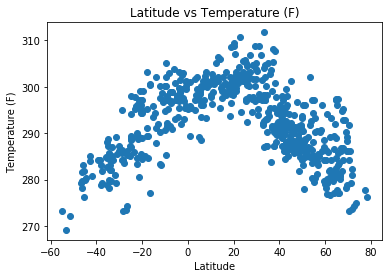

In [25]:
latitude = city_weather_data["Latitude"]
temparature = city_weather_data["Temperature (F)"]
_=plt.scatter(latitude, temparature)
_=plt.title("Latitude vs Temperature (F) Plot")
_=plt.xlabel("Latitude")
_=plt.ylabel("Temperature (F)")

## Latitude vs. Humidity Plot

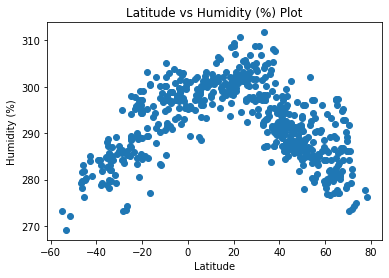

In [27]:
humidity = city_weather_data["Humidity (%)"]
_=plt.scatter(latitude, temparature)

_=plt.title("Latitude vs Humidity (%) Plot")
_=plt.xlabel("Latitude")
_=plt.ylabel("Humidity (%)")

## Latitude vs. Cloudiness Plot

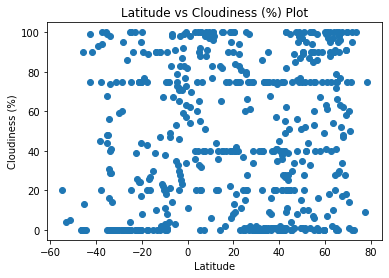

In [28]:
cloudiness = city_weather_data["Cloudiness (%)"]
_=plt.scatter(latitude, cloudiness)

_=plt.title("Latitude vs Cloudiness (%) Plot")
_=plt.xlabel("Latitude")
_=plt.ylabel("Cloudiness (%)")

## Latitude vs. Wind Speed Plot

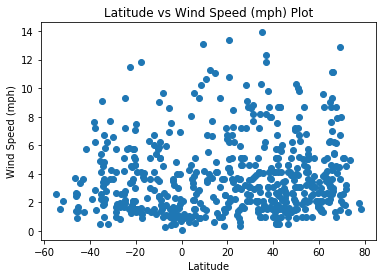

In [29]:
windspeed = city_weather_data["Wind Speed (mph)"]
_=plt.scatter(latitude, windspeed)

_=plt.title("Latitude vs Wind Speed (mph) Plot")
_=plt.xlabel("Latitude")
_=plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots

In [23]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression